In [67]:
# Import required libraries
import pandas as pd
import numpy as np

In [68]:
# Read the CSV file
df = pd.read_csv('bird_observations.csv')

# Display the first few rows
df.head()

,species,latitude,longitude,count
0,Accipiter badius,18.872976,88.783321,49
1,Psittacula krameri,31.271448,70.664165,2
2,Bubulcus ibis,17.050865,91.533259,13
3,Milvus migrans,20.994123,90.531768,2
4,Bubulcus ibis,23.264795,69.131464,5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    100 non-null    object 
 1   latitude   100 non-null    float64
 2   longitude  100 non-null    float64
 3   count      100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [70]:
# Get unique values for each column
for column in [df.columns[0], df.columns[1], df.columns[2]]:
    n_unique = df[column].nunique()
    print(f"\nUnique values in {column}: {n_unique}")
    print(df[column].value_counts().head())
    print("-" * 50)

# Alternative: To see just the unique values without counts
# for column in df.columns:
#     print(f"\nUnique values in {column}:")
#     print(df[column].unique())
#     print("-" * 50)


Unique values in species: 5
species
Accipiter badius      27
Milvus migrans        24
Psittacula krameri    19
Bubulcus ibis         18
Corvus splendens      12
Name: count, dtype: int64
--------------------------------------------------

Unique values in latitude: 100
latitude
18.872976    1
23.990147    1
32.956168    1
29.119138    1
11.406357    1
Name: count, dtype: int64
--------------------------------------------------

Unique values in longitude: 100
longitude
88.783321    1
81.925030    1
85.048625    1
82.181989    1
85.064063    1
Name: count, dtype: int64
--------------------------------------------------


# Distribution of bird species

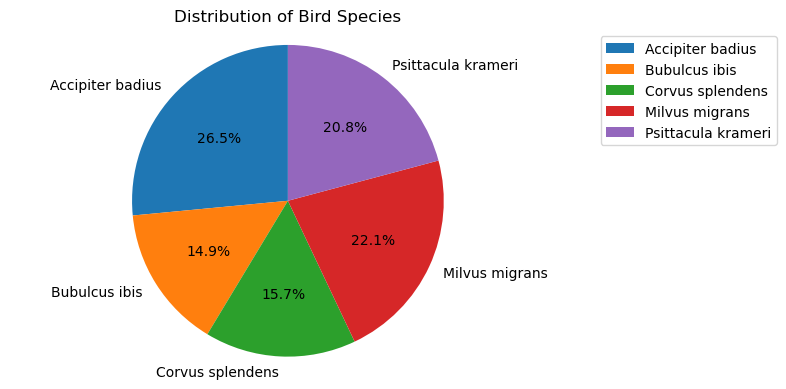


Total counts per species:
species
Accipiter badius      730
Bubulcus ibis         409
Corvus splendens      432
Milvus migrans        609
Psittacula krameri    574
Name: count, dtype: int64


In [82]:
import matplotlib.pyplot as plt

# Calculate total count per species
species_counts = df.groupby('species')['count'].sum()

# Create pie chart
plt.figure(figsize=(8, 4))
plt.pie(species_counts, 
        labels=species_counts.index,
        autopct='%1.1f%%',  # Show percentages
        startangle=90)      # Rotate start position

# Add title
plt.title('Distribution of Bird Species')

# Make it a perfect circle
plt.axis('equal')  

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the actual numbers
print("\nTotal counts per species:")
print(species_counts)

# Frequency of findings

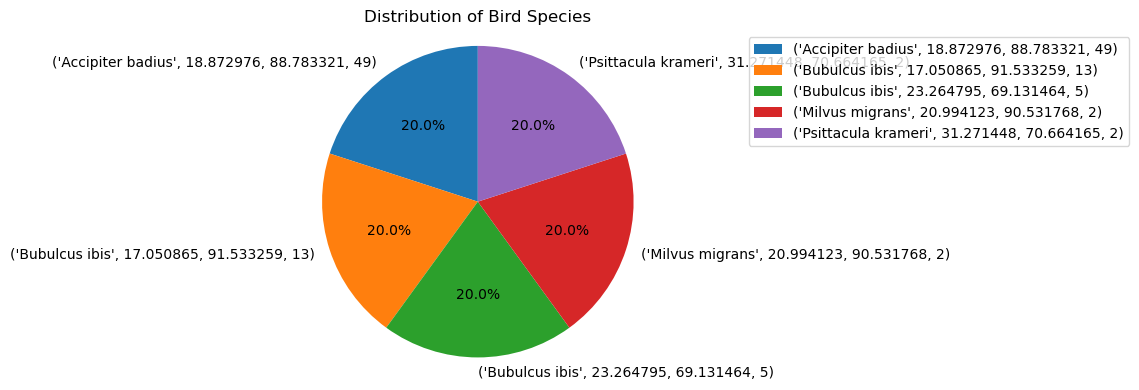

In [91]:
import matplotlib.pyplot as plt

# Calculate total count per species
species_counts = df.groupby('species').value_counts()

# Create pie chart
plt.figure(figsize=(10, 4))
plt.pie(species_counts, 
        labels=species_counts.index,
        autopct='%1.1f%%',  # Show percentages
        startangle=90)      # Rotate start position
plt.title('Distribution of Bird Species')
plt.axis('equal')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


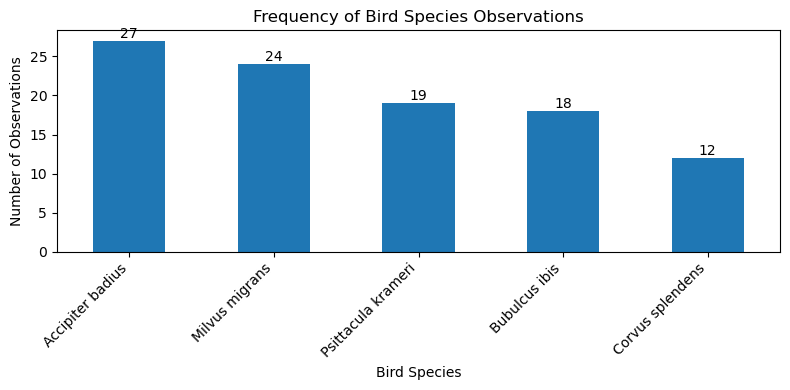


Frequency of observations per species:
species
Accipiter badius      27
Milvus migrans        24
Psittacula krameri    19
Bubulcus ibis         18
Corvus splendens      12
Name: count, dtype: int64


In [83]:
# Plot frequency of bird species observations
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each species
species_frequency = df['species'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 4))
species_frequency.plot(kind='bar')

# Customize the plot
plt.title('Frequency of Bird Species Observations')
plt.xlabel('Bird Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(species_frequency):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the actual frequencies
print("\nFrequency of observations per species:")
print(species_frequency)

# Which bird is most in number

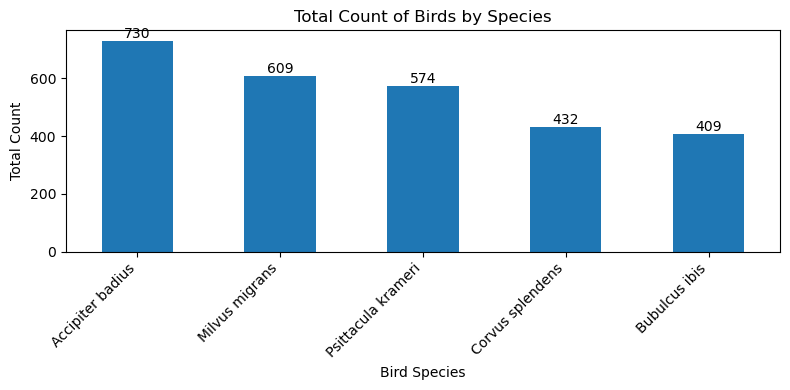


Total counts per species:
species
Accipiter badius      730
Milvus migrans        609
Psittacula krameri    574
Corvus splendens      432
Bubulcus ibis         409
Name: count, dtype: int64


In [73]:
import matplotlib.pyplot as plt

# Calculate and sort total count per species in ascending order
species_counts = df.groupby('species')['count'].sum().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(8, 4))
bars = species_counts.plot(kind='bar')

# Add value labels on top of each bar
for i, v in enumerate(species_counts):
    plt.text(i, v, str(int(v)), 
             ha='center', va='bottom')

# Customize the plot
plt.title('Total Count of Birds by Species')
plt.xlabel('Bird Species')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

# Print the actual numbers
print("\nTotal counts per species:")
print(species_counts)

# PLotting the points on map type

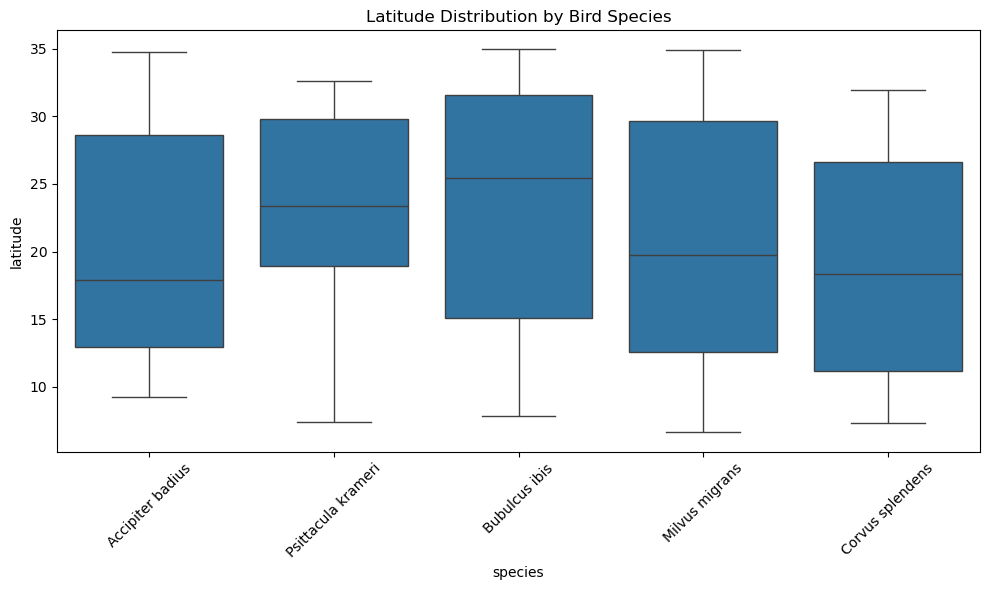

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot for latitude distribution by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='latitude', data=df)
plt.title('Latitude Distribution by Bird Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Other plots

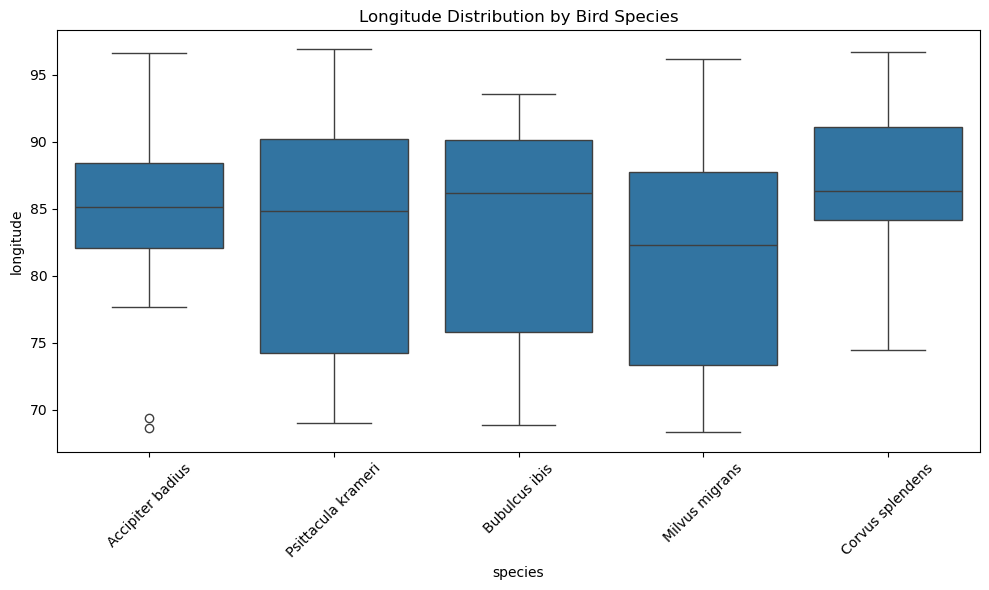

In [75]:
# Create box plot for longitude distribution by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='longitude', data=df)
plt.title('Longitude Distribution by Bird Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

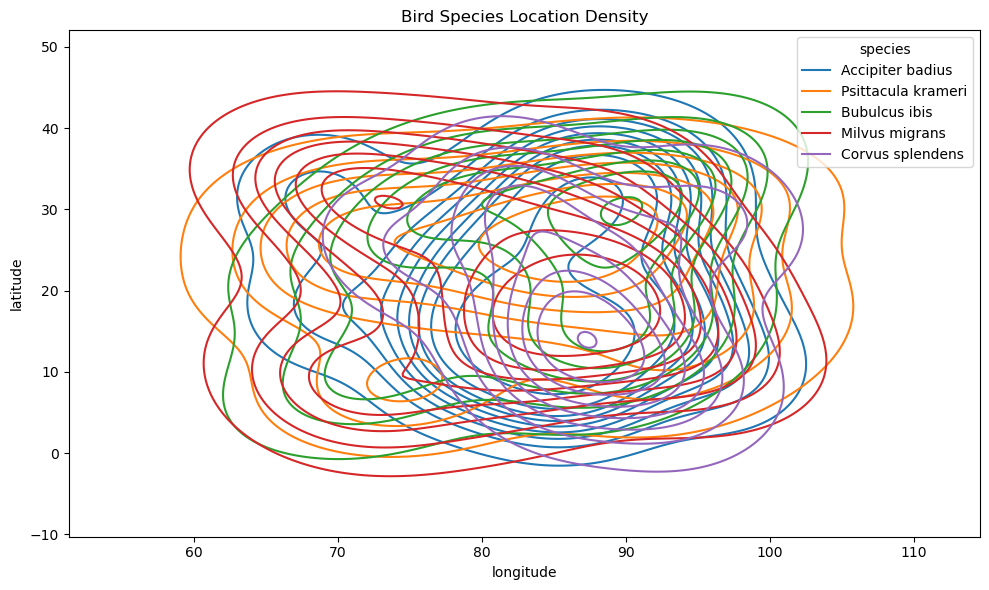

In [76]:
# Create density plot of locations
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='longitude', y='latitude', hue='species')
plt.title('Bird Species Location Density')
plt.tight_layout()
plt.show()

# Geographical distribution

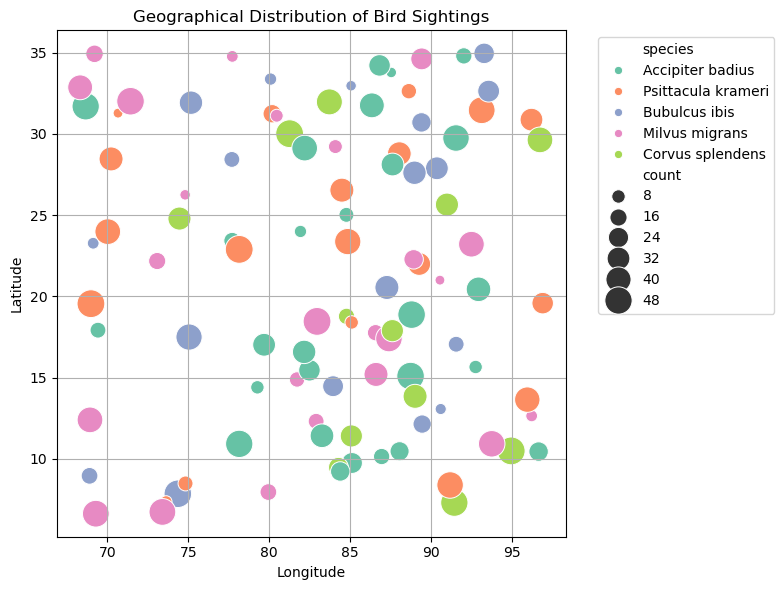

In [81]:
# 2. Geographical scatter plot (latitude vs longitude)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='species', 
                size='count', 
                sizes=(50, 400), 
                palette='Set2', legend=True)
plt.title('Geographical Distribution of Bird Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Change legend position - choose one of these options:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Outside right
# plt.legend(loc='upper right')  # Inside upper right
# plt.legend(loc='lower left')   # Inside lower left
# plt.legend(loc='center left')  # Inside center left
# plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')  # Below plot

plt.tight_layout()  # Adjust this after setting legend
plt.show()

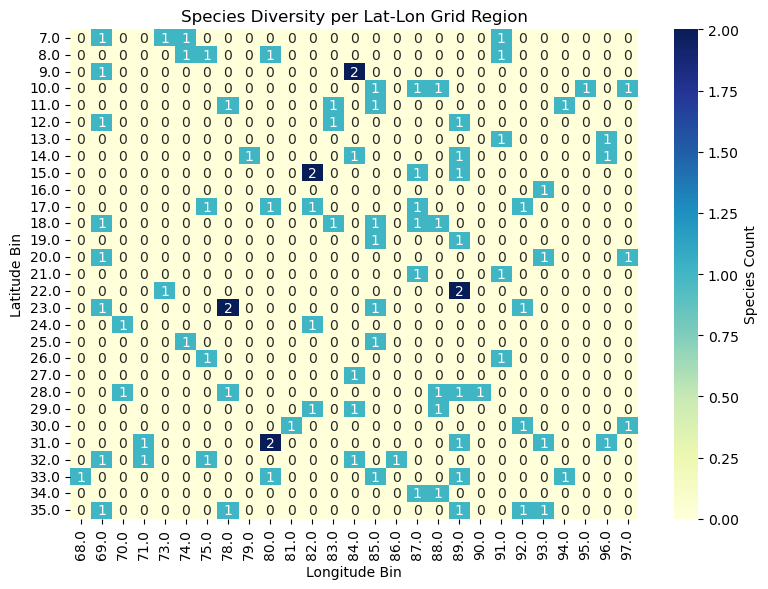

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create lat/lon bins to represent regions (1-degree binning)
df['lat_bin'] = df['latitude'].round()
df['lon_bin'] = df['longitude'].round()

# Count unique species per lat/lon bin (region)
diversity = df.groupby(['lat_bin', 'lon_bin'])['species'].nunique().reset_index()
diversity_pivot = diversity.pivot(index='lat_bin', columns='lon_bin', values='species').fillna(0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diversity_pivot, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Species Count'})
plt.title('Species Diversity per Lat-Lon Grid Region')
plt.xlabel('Longitude Bin')
plt.ylabel('Latitude Bin')
plt.tight_layout()
plt.show()


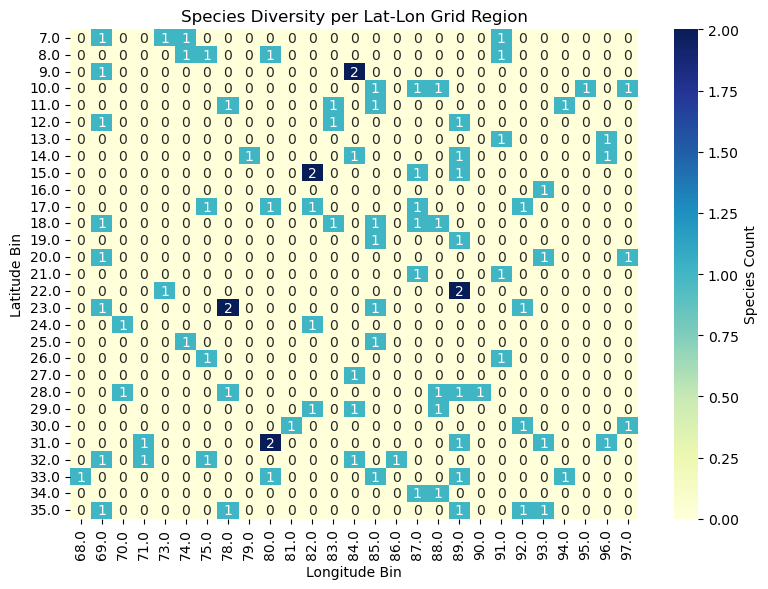

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create lat/lon bins to represent regions (1-degree binning)
df['lat_bin'] = df['latitude'].round()
df['lon_bin'] = df['longitude'].round()

# Count unique species per lat/lon bin (region)
diversity = df.groupby(['lat_bin', 'lon_bin'])['species'].nunique().reset_index()
diversity_pivot = diversity.pivot(index='lat_bin', columns='lon_bin', values='species').fillna(0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diversity_pivot, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Species Count'})
plt.title('Species Diversity per Lat-Lon Grid Region')
plt.xlabel('Longitude Bin')
plt.ylabel('Latitude Bin')
plt.tight_layout()
plt.show()


In [86]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Sample data
data = {
    'species': ['Accipiter badius', 'Psittacula krameri', 'Bubulcus ibis', 'Milvus migrans', 'Bubulcus ibis'],
    'latitude': [18.872976, 31.271448, 17.050865, 20.994123, 23.264795],
    'longitude': [88.783321, 70.664165, 91.533259, 90.531768, 69.131464],
    'count': [49, 2, 13, 2, 5]
}
df = pd.DataFrame(data)

# Initialize a folium map centered over India
map_center = [22.0, 80.0]
bird_map = folium.Map(location=map_center, zoom_start=5, tiles='CartoDB positron')

# Optional: Cluster nearby sightings
marker_cluster = MarkerCluster().add_to(bird_map)

# Add each bird sighting as a circle marker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5 + row['count'] / 10,  # size based on count
        popup=folium.Popup(f"Species: {row['species']}<br>Count: {row['count']}", max_width=200),
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Show map
bird_map
